<a href="https://colab.research.google.com/github/kyungmin0101/medical_ai/blob/main/240215/Medical_AI_day_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import csv
import os

file_path = '/content/drive/MyDrive/1stSeries_07.05.21/1.3/W0000.CSV'

f = open(file_path, 'rt')
reader = csv.reader(f)
csv_content = [raw for raw in reader]
f.close()
df = pd.DataFrame(csv_content)[24:].reset_index(drop=True)
df = df.astype(float)
df.columns = ['X', 'Y']
print(df)

              X             Y
0     1475.0000  7.976000e-07
1     1475.0198  9.544000e-07
2     1475.0397  5.796000e-07
3     1475.0595  1.106000e-06
4     1475.0794  6.473000e-07
...         ...           ...
6296  1599.9206  6.443000e-07
6297  1599.9405  8.647000e-07
6298  1599.9603  9.092000e-07
6299  1599.9802  7.652000e-07
6300  1600.0000  6.929000e-07

[6301 rows x 2 columns]


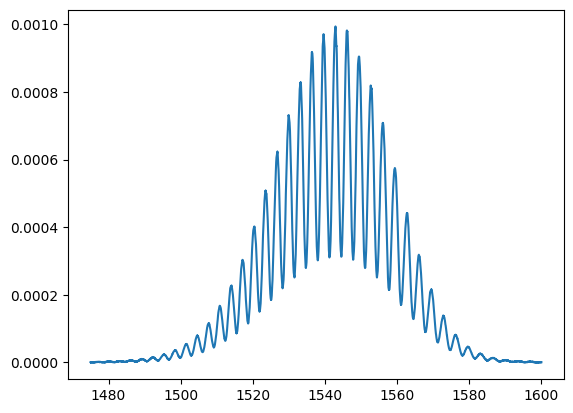

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df['X'], df['Y'])

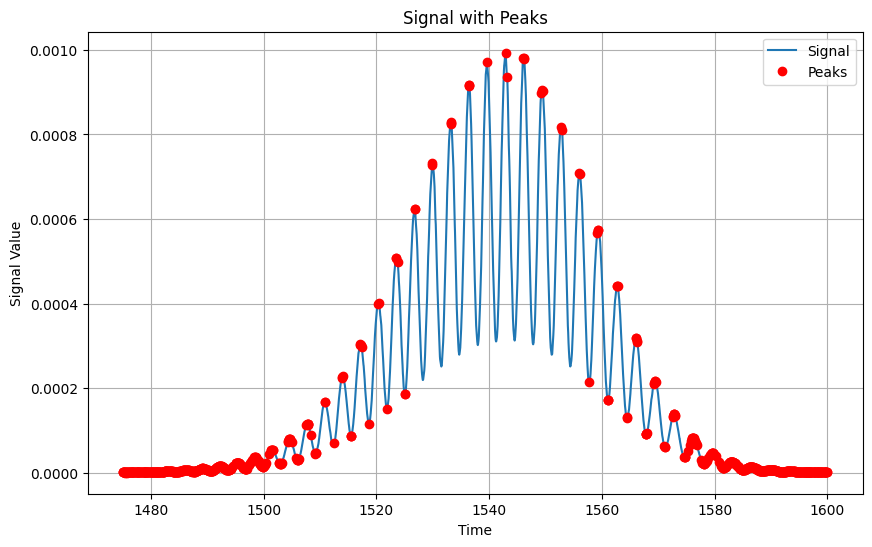

In [ ]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(df['Y'])

peak_values = df['Y'][peaks]
peak_times = df['X'][peaks]

plt.figure(figsize=(10, 6))
plt.plot(df['X'], df['Y'], label='Signal')
plt.plot(peak_times, peak_values, 'ro', label='Peaks')
plt.xlabel('Time')
plt.ylabel('Signal Value')
plt.title('Signal with Peaks')
plt.legend()
plt.grid(True)
plt.show()


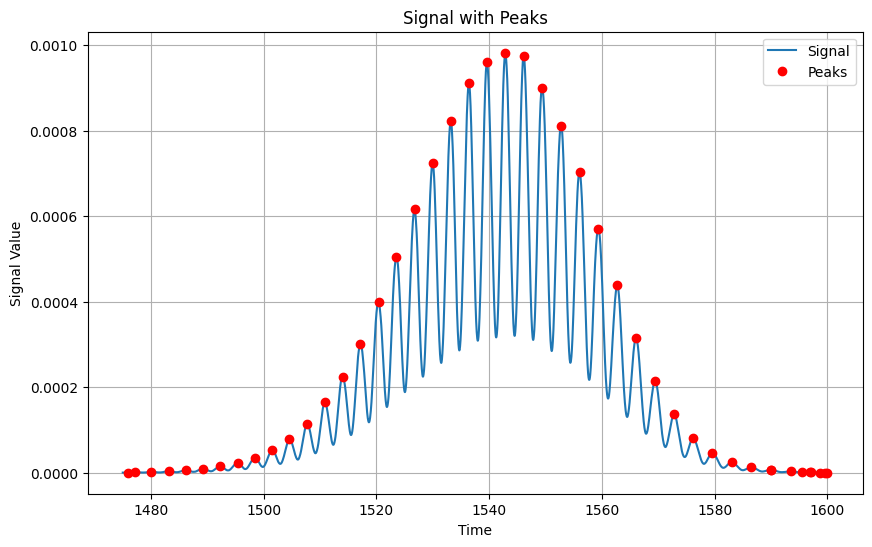

In [ ]:
from scipy.ndimage import gaussian_filter

smoothed_signal = gaussian_filter(df['Y'], sigma=5)
peaks, _ = find_peaks(smoothed_signal)

peak_values = smoothed_signal[peaks]
peak_times = df['X'][peaks]

plt.figure(figsize=(10, 6))
plt.plot(df['X'], smoothed_signal, label='Signal')
plt.plot(peak_times, peak_values, 'ro', label='Peaks')
plt.xlabel('Time')
plt.ylabel('Signal Value')
plt.title('Signal with Peaks')
plt.legend()
plt.grid(True)
plt.show()